In [8]:
import os
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [9]:
def SIR_derivatives(state, t, N, beta, gamma):
    S, I, R = state
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [10]:
def plot(S, I, R, days):

    suscpetible = S
    infected =I
    recovered = R
    days = days
    
    fig = plt.figure(facecolor='w', figsize=(12, 7))
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(days, suscpetible, 'b',
            alpha=0.5, linestyle = '--', lw=2, label='Susceptible')
    ax.plot(days, infected, 'r',
            alpha=0.5, linestyle = '--', lw=2, label='Infected')
    ax.plot(days, recovered, 'g',
            alpha=0.5, linestyle = '--', lw=2, label='Recovered')

    ax.set_xlabel('Days')
    ax.set_ylabel('Students')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

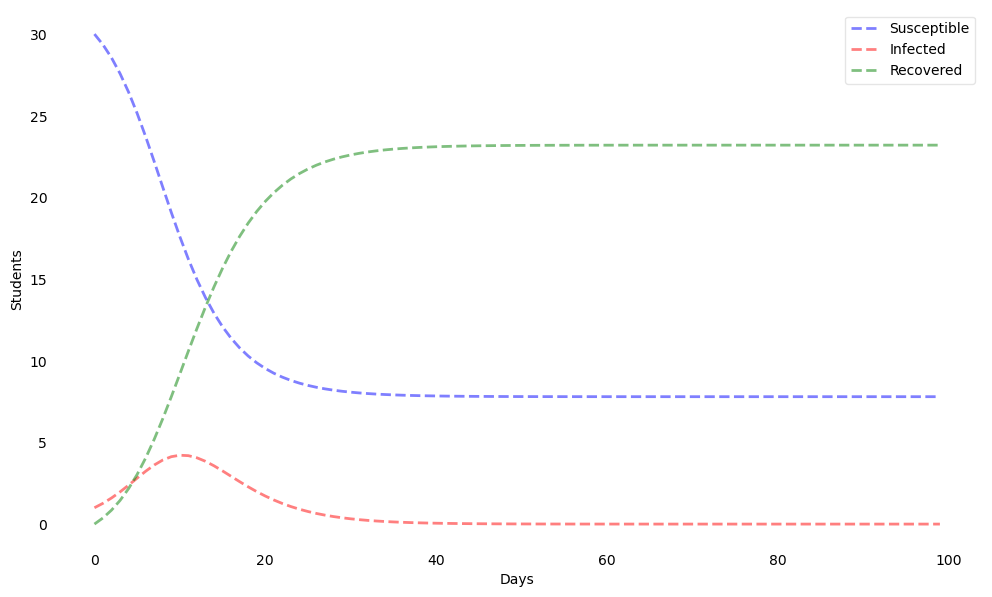

In [11]:
population = 31
recovered = 0
infected = 1
susceptible = population - infected - recovered
days_to_recover = 3
infection_rate = 0.02

transition_rate = susceptible * infection_rate
recovery_rate = 1/days_to_recover

days = range(0, 100)

diff = odeint(SIR_derivatives,[susceptible, infected, recovered],days, args=(population, transition_rate, recovery_rate))

S, I, R = diff.T

df = pd.DataFrame({'Susceptible': S,'Infected': I,'Recovered': R})

plot(S, I, R, days)

In [12]:
df.head(50)

,Susceptible,Infected,Recovered
0,30.000000,1.000000,0.000000
1,29.349787,1.272838,0.377375
2,28.548100,1.597557,0.854343
3,27.581013,1.971118,1.447868
4,26.444277,2.383008,2.172714
5,25.147490,2.813833,3.038677
6,23.716549,3.235810,4.047641
7,22.192873,3.615898,5.191229
8,20.628755,3.921326,6.449918
9,19.079809,4.125986,7.794205
